In [2]:
%%time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pyaudio
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

Wall time: 0 ns


# Function to conduct audiometry

In [3]:
def test():
    
    S = "Press 't' if heard \nPress 'f' if not \n"
    freqs =[250.0,500.0,1000.0,2000.0,4000.0, 8000.0]
    A_f = 1
    
    points = []
    volumes =[]
    points2=[]
    volumes2=[]
    
    p = pyaudio.PyAudio()
    
    stream = p.open(format=pyaudio.paFloat32,channels=1,rate=44100,output=True)
    
    def play_freqs():
        
        volume = 0.1*A_f
        duration = 1.0  # in seconds, may be float
        fs = 44100  # sampling rate, Hz, must be integer
        print("Audiometric test\n")
        
        i=0
        volume = 0.1*A_f
                
        samples = (np.sin(2 * np.pi * np.arange(fs * duration) * freqs[0] / fs)).astype(np.float32)
                
        stream.write(volume * samples)
                
        while i<len(freqs):
            
            x = input(S)#it should continue until sounds of all frequencies from the list are played
            print("\n")
                
            if x == 'f':
                    
                volume = volume + 0.1*A_f
                samples = (np.sin(2 * np.pi * np.arange(fs * duration) * freqs[i] / fs)).astype(np.float32)
                stream.write(volume*samples)
                #points.append(freqs[i])
                #volumes.append(float(volume))
                    
                #stream.write(volume*samples)
                #points.append(freqs[i])
                #volumes.append(float(volume))
                    
            if x == 't':
                
                points2.append(freqs[i])
                volumes2.append(float(volume))
                
                if(i<len(freqs)-1):
                    i = i + 1 #it should continue with the next element from list freqs
            
                    volume = 0.1*A_f
                    samples = (np.sin(2 * np.pi * np.arange(fs * duration) * freqs[i] / fs)).astype(np.float32)
                    stream.write(volume * samples)
                
                if(i==len(freqs)-1):
                    break
                
                
    play_freqs()
    
    F = np.array(points2)
    I = np.array(volumes2)
    plt.plot(np.array(points2),np.array(volumes2),'-o',color="green",markersize=4)
    plt.title("Results of Audiometry: Audiogram")
    plt.xlabel("Frequencies")
    plt.ylabel("Intensities")
    
    S = pd.DataFrame(I, index = F)
    
    return S 

Audiometric test

Press 't' if heard 
Press 'f' if not 
t


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
t


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
t


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
t


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 



Press 't' if heard 
Press 'f' if not 
f


Press 't' if heard 
Press 'f' if not 
t




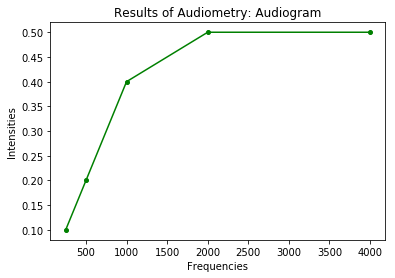

In [21]:
S = test()

# Preprocessing of audiogram for further analysis

In [22]:
F = S.index.values
I = S.values
F = F.reshape(-1,1)  # saves the use of len()
X_train, X_test, y_train, y_test = train_test_split(F, I, random_state = 0) 
score_mse = {}
trained_models = {}

# Regression using ML algorithms based on Information Entropy

0.158113883008419


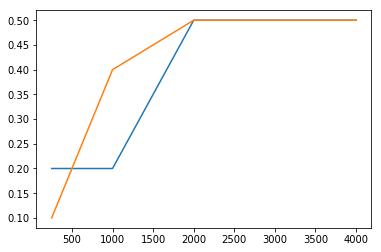

In [23]:
regr = DecisionTreeRegressor(max_depth=10)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

mse = (np.mean((y_test - y_pred)**2))**0.5
score_mse['Decision Tree Regression'] = (np.mean((y_test - y_pred)**2))**0.5
print((np.mean((y_test - y_pred)**2)**0.5))

y_predf = regr.predict(F)
plt.plot(F,y_predf)
plt.plot(F,I)
trained_models['Decision Tree Regression'] = regr
if(mse<=0.1):
    plt.scatter(F,y_predf)

# Polynomial regression using ML based gradient Descent Algorthm 

0.05351187165633857 2


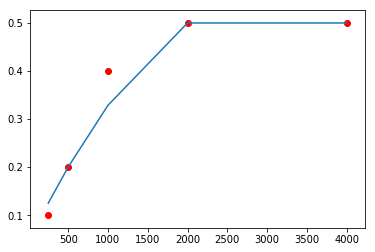

In [26]:
x = X_train
y = y_train

from sklearn.preprocessing import PolynomialFeatures

models = []
for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(x)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression
regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1
for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = (np.mean((y_pred - y_test)**2))**0.5
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1
    

print(min_mse,minj)

score_mse['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(F)    
y_pred  = regressors[minj].predict(poly_x)

if(min_mse<=0.1):
    plt.plot(F,y_pred)
    plt.scatter(F,I,color = 'r')
trained_models['Polynomial_Regression'] = regressors[minj]

# Considering regularization term for polynomial Regression using gradient descent

In [27]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression, Ridge

# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(X_train,y_train)
p = ridge.predict(X_test)
mse = (np.mean((p-y_test)**2))**0.5

print(mse)
score_mse['Ridge_Regression'] = mse
trained_models['Ridge_Regression'] = ridge

if(mse<=0.1):
    plt.scatter(F,ridge.predict(F))
    plt.scatter(F,I)



0.1221796552322688


# Selecting the best algorithm and Extrapolation of Continuous Data

Model Used:  Polynomial_Regression


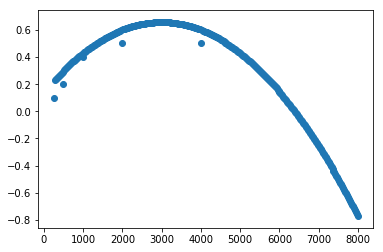

In [32]:
def pred_adj(x,m):
    if(m=='Polynomial_Regression'):
        poly = PolynomialFeatures(degree=minj)
        poly_x = poly.fit_transform(x)  
        return poly_x
    else:
        return x

f_sam = 25
X_f = np.arange(250,8000+ f_sam,f_sam)
X_f = X_f.reshape(-1,1)
#print(score_mse)

Y_i = trained_models[min(score_mse, key=score_mse.get)].predict(pred_adj(X_f,min(score_mse, key=score_mse.get)))

for y in Y_i:
    if(y<=0):
        y = 0.2
Y_i += 0.1

import pandas as pd
#print(np.shape(Y_i),np.shape(X_f))
X_f = X_f.reshape(-1,)

X_o = np.array([])


Q = pd.DataFrame(Y_i, index = X_f)
for i in F:
    Q.loc[i] = S.loc[i]

#print(S.loc[2000])

print("Model Used: ", min(score_mse, key=score_mse.get) )

if(score_mse[min(score_mse, key=score_mse.get)] <= 0.1):
    plt.scatter(Q.index,Q.values)
else:
    plt.plot(S.index,S.values)

#plt.scatter(F,I)
#print(np.shape(Y_i),np.shape(X_f))
#print(np.shape(S.loc[3000]))
#print(type(S.loc[3000].values))

# Designing the update function based on Continuous Audiogram obtained above

In [33]:
def min_f(f):
    if(f<250):
        return 250
    else:
        return f 

def max_f(f):
    if(f>8000):
        return 8000
    else:
        return f

def audio_shift(f,i,shift_limit = 100):
    
    if(i>=Q.loc[f].values):
        return (f,i)
    
    else:
        D = Q.loc[min_f(f-shift_limit):max_f(f+shift_limit)]
        minf = f
        mini = Q.loc[minf].values
        #print(D)
        for j in range(min_f(f-shift_limit),max_f(f+shift_limit),25):
            if(D.loc[j].values < mini):
                minf = j
                mini = D.loc[j].values
        
        return(minf, mini)

# Measure time taken to shift one sample to audible region

In [34]:
%%time
Fi = 2000
Ii = 0.2 
Ff,If = audio_shift(Fi,Ii)
print(Ff,If)

2000 [0.5]
Wall time: 4.45 ms


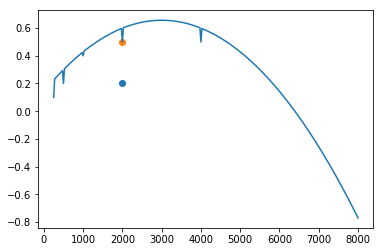

In [35]:
plt.plot(Q)
def c(x):
    return np.array(x)
plt.scatter(c(Fi),c(Ii))
plt.scatter(c(Ff),c(If))